In [8]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.metrics import recall_score

In [9]:
data = pd.read_csv('C:/Users/SIMPLON/Desktop/FAKE_NEWS/text.csv')
data.drop(columns=['Unnamed: 0'],inplace=True)

In [10]:
data.columns

Index(['text', 'is_fake', 'cleaned_text'], dtype='object')

In [11]:
data.head(2)

text  is_fake  \
0  As U.S. budget fight looms, Republicans flip t...        0   
1  U.S. military to accept transgender recruits o...        0   

                                        cleaned_text  
0  us budget fight loom republican flip fiscal sc...  
1  us militari accept transgend recruit monday pe...

In [192]:
df=data.copy()
#df.head()
y=df.is_fake
X=df.cleaned_text

In [50]:
# Preparing training and testing data using train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state= 2022,stratify=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state= 2022,stratify=y)
y=df.is_fake
X=df.cleaned_text

# CountVectorize

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')
count_train= count_vectorizer.fit_transform(X_train)
count_test= count_vectorizer.transform(X_test)

# Matrice de fonctionnalités TF-IDF

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english',max_df=0.7)
Tfidf_train= vectorizer.fit_transform(X_train)
Tfidf_test= vectorizer.transform(X_test)

# Pipeline

## MultinomialNB +  Tfidf

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
pipe = Pipeline([('Tfidf_V', vectorizer)
                 , ('MNB',  MultinomialNB())])


In [18]:
pipe.fit(X_train,y_train)
predictions_MNB = pipe.predict(X_test)

In [19]:
# Model evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
print(classification_report(y_test, predictions_MNB))
print(confusion_matrix(y_test, predictions_MNB))

MNB_f1 = round(f1_score(y_test,predictions_MNB, average='weighted'), 3)
MNB_accuracy = round((accuracy_score(y_test, predictions_MNB)*100),2)

print("Accuracy : " , MNB_accuracy , " %")
print("f1_score : " , MNB_f1)

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      5354
           1       0.93      0.94      0.93      5871

    accuracy                           0.93     11225
   macro avg       0.93      0.93      0.93     11225
weighted avg       0.93      0.93      0.93     11225

[[4921  433]
 [ 346 5525]]
Accuracy :  93.06  %
f1_score :  0.931


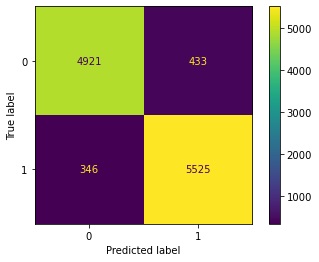

In [20]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
cfm=confusion_matrix(y_test, predictions_MNB)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=pipe.classes_)
disp.plot() 

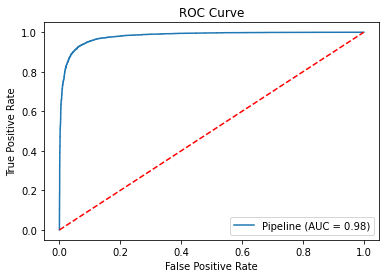

In [39]:
# ROC Curve
from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve
plot_roc_curve(pipe, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

##  MultinomialNB +  countVector

In [21]:
pipe2 = Pipeline([('count_V', count_vectorizer)
                 , ('MNB',  MultinomialNB())])
pipe2.fit(X_train,y_train)
predictions_MNB2 = pipe2.predict(X_test)

In [ ]:
# Model evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
print(classification_report(y_test, predictions_rfc))
print(confusion_matrix(y_test, predictions_rfc))

rfc_f1 = round(f1_score(y_test,predictions_rfc, average='weighted'), 3)
rfc_accuracy = round((accuracy_score(y_test, predictions_rfc)*100),2)

In [33]:
# Model evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
print(classification_report(y_test, predictions_MNB2))
print(confusion_matrix(y_test, predictions_MNB2))

MNB2_f1 = round(f1_score(y_test,predictions_MNB2, average='weighted'), 3)
MNB2_accuracy = round((accuracy_score(y_test, predictions_MNB2)*100),2)

print("Accuracy : " , MNB_accuracy , " %")
print("f1_score : " , MNB_f1)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      5354
           1       0.95      0.95      0.95      5871

    accuracy                           0.95     11225
   macro avg       0.95      0.95      0.95     11225
weighted avg       0.95      0.95      0.95     11225

[[5051  303]
 [ 277 5594]]
Accuracy :  93.06  %
f1_score :  0.931


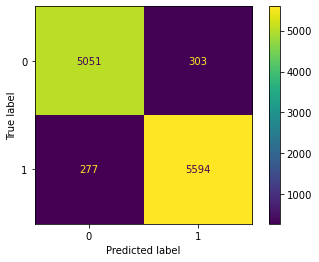

In [23]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
cfm=confusion_matrix(y_test, predictions_MNB2)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=pipe2.classes_)
disp.plot() 

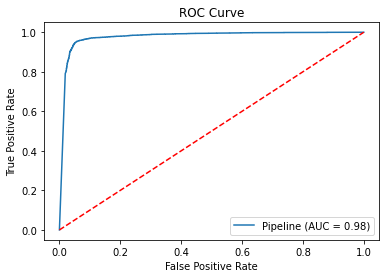

In [38]:
# ROC Curve
from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve
plot_roc_curve(pipe2, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

## Random Forest+ Tfidf

In [24]:
from sklearn.ensemble import RandomForestClassifier
pipe_rfc = Pipeline([('Tfidf_V', vectorizer)
                 , ('rfc',RandomForestClassifier(n_estimators= 10, random_state= 2022))])


In [25]:
pipe_rfc.fit(X_train,y_train)

Pipeline(steps=[('Tfidf_V', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('rfc',
                 RandomForestClassifier(n_estimators=10, random_state=2022))])

In [26]:
predictions_rfc = pipe.predict(X_test)

In [27]:
# Model evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
print(classification_report(y_test, predictions_rfc))
print(confusion_matrix(y_test, predictions_rfc))

rfc_f1 = round(f1_score(y_test,predictions_rfc, average='weighted'), 3)
rfc_accuracy = round((accuracy_score(y_test, predictions_rfc)*100),2)

print("Accuracy : " , rfc_accuracy , " %")
print("f1_score : " , rfc_f1)

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      5354
           1       0.93      0.94      0.93      5871

    accuracy                           0.93     11225
   macro avg       0.93      0.93      0.93     11225
weighted avg       0.93      0.93      0.93     11225

[[4921  433]
 [ 346 5525]]
Accuracy :  93.06  %
f1_score :  0.931


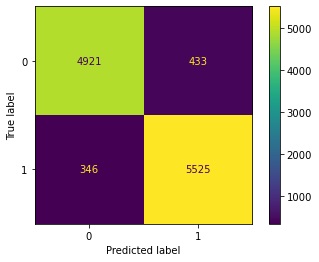

In [32]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
cfm=confusion_matrix(y_test, predictions_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=pipe_rfc.classes_)
disp.plot()

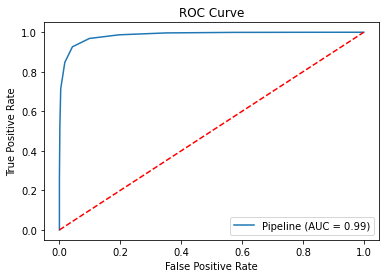

In [37]:
# ROC Curve
from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve
plot_roc_curve(pipe_rfc, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

## Random Forest + countVector

In [29]:
pipe_rfc2 = Pipeline([('Tfidf_V', count_vectorizer)
                 , ('rfc',RandomForestClassifier(n_estimators= 10, random_state= 2022))])
pipe_rfc2.fit(X_train,y_train)
predictions_rfc2 = pipe_rfc2.predict(X_test)

In [30]:
# Model evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
print(classification_report(y_test, predictions_rfc2))
print(confusion_matrix(y_test, predictions_rfc2))

rfc2_f1 = round(f1_score(y_test,predictions_rfc2, average='weighted'), 3)
rfc2_accuracy = round((accuracy_score(y_test, predictions_rfc2)*100),2)

print("Accuracy : " , rfc2_accuracy , " %")
print("f1_score : " , rfc2_f1)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      5354
           1       0.96      0.92      0.94      5871

    accuracy                           0.94     11225
   macro avg       0.94      0.94      0.94     11225
weighted avg       0.94      0.94      0.94     11225

[[5127  227]
 [ 491 5380]]
Accuracy :  93.6  %
f1_score :  0.936


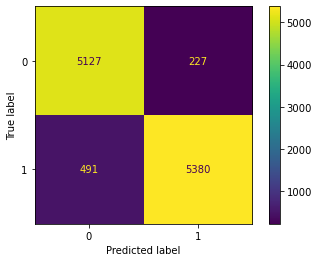

In [31]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
cfm=confusion_matrix(y_test, predictions_rfc2)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=pipe_rfc2.classes_)
disp.plot()

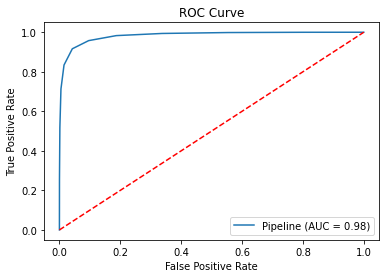

In [36]:
# ROC Curve
from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve
plot_roc_curve(pipe_rfc2, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

# Pipeline & Gridsearch & text

In [87]:
y=df.is_fake
X=df.text
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state= 2022,stratify=y)

In [88]:
# Pipeline & Gridsearch setup
# TFIDF pipeline setup
tvc_pipe = Pipeline([
 ('tvec', TfidfVectorizer()),
 ('mb', MultinomialNB())
])
# Randomforest pipeline setup
rf_pipe = Pipeline([
 ('tvec', TfidfVectorizer()),
 ('rf', RandomForestClassifier())
])
# Fit
tvc_pipe.fit(X_train, y_train)
rf_pipe.fit(X_train, y_train)
# Setting params for TFIDF Vectorizer gridsearch
tf_params = {
 'tvec__max_features':[100, 2000],
 'tvec__ngram_range': [(1, 1), (1, 2), (2, 2)],
 'tvec__stop_words': [None, 'english'],
 
}
# Setting up randomforest params
rf_params = {
 'tvec__max_features':[2000],
 'tvec__ngram_range': [(1, 2)],
 'tvec__stop_words': ['english'],
 'rf__max_depth': [1000],
 'rf__min_samples_split': [100],
 'rf__max_leaf_nodes': [None]
}

In [89]:
from sklearn.model_selection import GridSearchCV
# Setting up GridSearch for Randomforest
rf_gs = GridSearchCV(rf_pipe, param_grid=rf_params, cv = 5, verbose = 1, n_jobs = -1)
# Setting up GridSearch for TFIDFVectorizer
tvc_gs = GridSearchCV(tvc_pipe, param_grid=tf_params, cv = 5, verbose =1, n_jobs = -1)
# Fitting TVC GS
tvc_gs.fit(X_train, y_train)
# Fitting Randomforest CV GS
rf_gs.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 13.6min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.4min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [1000], 'rf__max_leaf_nodes': [None],
                         'rf__min_samples_split': [100],
                         'tvec__max_features': [2000],
                         'tvec__ngram_range': [(1, 2)],
                         'tvec__stop_words': ['english']},
             verbose=1)

In [90]:
# Scoring Training data on TFIDFVectorizer
tvc_gs.score(X_train, y_train)

0.9518888096935139

In [91]:
# Scoring Test data on TFIDFVectorizer
tvc_gs.score(X_test, y_test)


0.9518930957683742

In [92]:
# Scoring Training data on RandomForest
rf_gs.score(X_train, y_train)


0.9971786647659777

In [93]:
# Checking Test score on RandomForest
rf_gs.score(X_test, y_test)


0.9830734966592427

In [94]:
tvc_title = pd.DataFrame(rf_pipe.steps[1][1].feature_importances_, tvc_pipe.steps[0][1].get_feature_names(), columns=['importance'])
tvc_title.sort_values('importance', ascending = False).head(20)

,importance
said,0.023774
via,0.020432
video,0.016420
featured,0.011048
on,0.009635
you,0.007723
watch,0.007645
image,0.007195
this,0.006087
reuters,0.006002


### Model

In [95]:
grid_result_rf = rf_gs.fit(X_train, y_train)




Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.0min finished


In [97]:
print('Best params: ', grid_result_rf.best_params_)

Best params:  {'rf__max_depth': 1000, 'rf__max_leaf_nodes': None, 'rf__min_samples_split': 100, 'tvec__max_features': 2000, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': 'english'}


In [102]:
model =grid_result_rf.best_estimator_

y_pred = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('f1-score: ', f1_score(y_test, y_pred))

Accuracy:  0.9837861915367483
Precision:  0.9881585721640639
Recall:  0.9807528530063022
f1-score:  0.9844417849204993


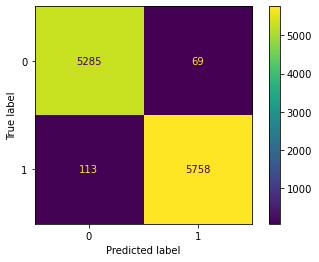

In [103]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
cfm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=grid_result_rf.classes_)
disp.plot() 

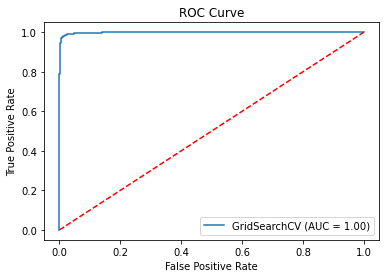

In [109]:
# ROC Curve
from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve
plot_roc_curve(grid_result_rf, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

In [116]:
# Export pipeline as pickle file
with open("model_final.pkl", "wb") as file:
    pickle.dump(model, file)


In [117]:
# Load pipeline from pickle file
my_pipeline = pickle.load(open("model_final.pkl","rb"))

my_pipeline.score(X_test, y_test)

0.9837861915367483

### Model2

In [104]:
grid_result_BN = tvc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 14.1min finished


In [105]:
print('Best params: ', grid_result_BN.best_params_)

Best params:  {'tvec__max_features': 2000, 'tvec__ngram_range': (2, 2), 'tvec__stop_words': None}


In [106]:
model2 =grid_result_BN.best_estimator_

y_pred = model2.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('f1-score: ', f1_score(y_test, y_pred))

Accuracy:  0.9518930957683742
Precision:  0.9604422179996546
Recall:  0.9470277635837165
f1-score:  0.9536878216123499


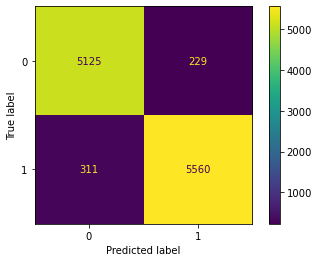

In [107]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
cfm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=grid_result_BN.classes_)
disp.plot() 

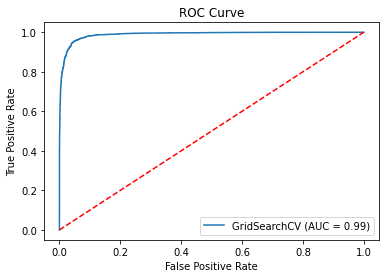

In [108]:
# ROC Curve
from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve
plot_roc_curve(grid_result_BN, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

# Pipeline & Gridsearch & cleaned_text

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state= 2022,stratify=y)
y=df.is_fake
X=df.cleaned_text

In [63]:
# Pipeline & Gridsearch setup
# TFIDF pipeline setup
tvc_pipe = Pipeline([
 ('tvec', TfidfVectorizer()),
 ('mb', MultinomialNB())
])
# Randomforest pipeline setup
rf_pipe = Pipeline([
 ('tvec', TfidfVectorizer()),
 ('rf', RandomForestClassifier())
])
# Fit
tvc_pipe.fit(X_train, y_train)
rf_pipe.fit(X_train, y_train)
# Setting params for TFIDF Vectorizer gridsearch
tf_params = {
 'tvec__max_features':[100, 2000],
 'tvec__ngram_range': [(1, 1), (1, 2), (2, 2)],
 'tvec__stop_words': [None, 'english'],
 
}
# Setting up randomforest params
rf_params = {
 'tvec__max_features':[2000],
 'tvec__ngram_range': [(1, 2)],
 'tvec__stop_words': ['english'],
 'rf__max_depth': [1000],
 'rf__min_samples_split': [100],
 'rf__max_leaf_nodes': [None]
}

In [64]:
# Setting up GridSearch for Randomforest
rf_gs = GridSearchCV(rf_pipe, param_grid=rf_params, cv = 5, verbose = 1, n_jobs = -1)
# Setting up GridSearch for TFIDFVectorizer
tvc_gs = GridSearchCV(tvc_pipe, param_grid=tf_params, cv = 5, verbose =1, n_jobs = -1)
# Fitting TVC GS
tvc_gs.fit(X_train, y_train)
# Fitting Randomforest CV GS
rf_gs.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 13.4min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.1min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [1000], 'rf__max_leaf_nodes': [None],
                         'rf__min_samples_split': [100],
                         'tvec__max_features': [2000],
                         'tvec__ngram_range': [(1, 2)],
                         'tvec__stop_words': ['english']},
             verbose=1)

In [65]:
# Scoring Training data on TFIDFVectorizer
tvc_gs.score(X_train, y_train)

0.9518888096935139

In [66]:
# Scoring Test data on TFIDFVectorizer
tvc_gs.score(X_test, y_test)


0.9518930957683742

In [196]:
model_tvc_gs =tvc_gs.best_estimator_

y_pred_tvc_gs =model_tvc_gs.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,y_pred_tvc_gs))
print('Precision: ', precision_score(y_test,y_pred_tvc_gs))
print('Recall: ', recall_score(y_test,y_pred_tvc_gs))
print('f1-score: ', f1_score(y_test,y_pred_tvc_gs))

Accuracy:  0.9518930957683742
Precision:  0.9604422179996546
Recall:  0.9470277635837165
f1-score:  0.9536878216123499


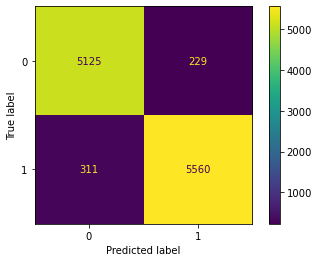

In [197]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
cfm=confusion_matrix(y_test, y_pred_tvc_gs)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=tvc_gs.classes_)
disp.plot() 

In [198]:
print(classification_report(y_test,y_pred_tvc_gs))
print(confusion_matrix(y_test, y_pred_tvc_gs))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5354
           1       0.96      0.95      0.95      5871

    accuracy                           0.95     11225
   macro avg       0.95      0.95      0.95     11225
weighted avg       0.95      0.95      0.95     11225

[[5125  229]
 [ 311 5560]]


In [81]:
tvc_gs.best_score_

0.9507008699881752

In [67]:
# Scoring Training data on RandomForest
rf_gs.score(X_train, y_train)

0.99700047517225

In [68]:
# Checking Test score on RandomForest
rf_gs.score(X_test, y_test)

0.9843207126948775

In [80]:
rf_gs.best_score_

0.9808148612157522

In [69]:
tvc_title = pd.DataFrame(rf_pipe.steps[1][1].feature_importances_, tvc_pipe.steps[0][1].get_feature_names(), columns=['importance'])
tvc_title.sort_values('importance', ascending = False).head(20)

,importance
said,0.018136
video,0.016915
via,0.015289
on,0.010353
you,0.008109
featured,0.007634
image,0.007289
is,0.007056
minister,0.006547
this,0.006488


In [120]:
from sklearn.feature_extraction.text import TfidfTransformer
pipeline = Pipeline(
    [
        ("vect", CountVectorizer()),
        ("tfidf", TfidfTransformer()),
        ("clf", RandomForestClassifier()),
    ]
)
pipeline.fit(X_train, y_train)
pipeline.get_params()

{'memory': None,
 'steps': [('vect', CountVectorizer()),
  ('tfidf', TfidfTransformer()),
  ('clf', RandomForestClassifier())],
 'verbose': False,
 'vect': CountVectorizer(),
 'tfidf': TfidfTransformer(),
 'clf': RandomForestClassifier(),
 'vect__analyzer': 'word',
 'vect__binary': False,
 'vect__decode_error': 'strict',
 'vect__dtype': numpy.int64,
 'vect__encoding': 'utf-8',
 'vect__input': 'content',
 'vect__lowercase': True,
 'vect__max_df': 1.0,
 'vect__max_features': None,
 'vect__min_df': 1,
 'vect__ngram_range': (1, 1),
 'vect__preprocessor': None,
 'vect__stop_words': None,
 'vect__strip_accents': None,
 'vect__token_pattern': '(?u)\\b\\w\\w+\\b',
 'vect__tokenizer': None,
 'vect__vocabulary': None,
 'tfidf__norm': 'l2',
 'tfidf__smooth_idf': True,
 'tfidf__sublinear_tf': False,
 'tfidf__use_idf': True,
 'clf__bootstrap': True,
 'clf__ccp_alpha': 0.0,
 'clf__class_weight': None,
 'clf__criterion': 'gini',
 'clf__max_depth': None,
 'clf__max_features': 'auto',
 'clf__max_leaf_n

In [123]:
parameters = {
    "vect__max_df": (0.5, 0.75, 1.0),
    'vect__max_features': (None, 5000, 10000),
    "vect__ngram_range": ((1, 1), (1, 2)),  # unigrams or bigrams
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__ccp_alpha': [0.00001],
    'clf__max_depth':[100],
    'clf__min_samples_split':[100],
    'clf__max_leaf_nodes': [None]
}


In [124]:
gs = GridSearchCV(pipeline, param_grid=parameters, cv = 5, verbose = 1, n_jobs = -1)

In [125]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 91.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 526.3min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 687.4min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                       ('tfidf', TfidfTransformer()),
                                       ('clf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'clf__ccp_alpha': [1e-05], 'clf__max_depth': [100],
                         'clf__max_leaf_nodes': [None],
                         'clf__min_samples_split': [100],
                         'tfidf__norm': ('l1', 'l2'),
                         'tfidf__use_idf': (True, False),
                         'vect__max_df': (0.5, 0.75, 1.0),
                         'vect__max_features': (None, 5000, 10000),
                         'vect__ngram_range': ((1, 1), (1, 2))},
             verbose=1)

In [126]:
print("train score",gs.score(X_train, y_train))
print("test score",gs.score(X_test, y_test
                           ))

train score 0.9996139225469233
test score 0.9897550111358575


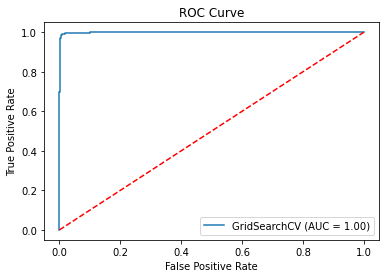

In [127]:
# ROC Curve
from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve
plot_roc_curve(gs, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

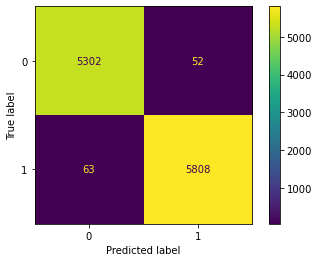

In [142]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
cfm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=gs.classes_)
disp.plot() 

In [144]:
print('Best params: ', gs.best_params_)

Best params:  {'clf__ccp_alpha': 1e-05, 'clf__max_depth': 100, 'clf__max_leaf_nodes': None, 'clf__min_samples_split': 100, 'tfidf__norm': 'l2', 'tfidf__use_idf': False, 'vect__max_df': 1.0, 'vect__max_features': 10000, 'vect__ngram_range': (1, 2)}


In [145]:
model3 =gs.best_estimator_

y_pred3 = model3.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('f1-score: ', f1_score(y_test, y_pred))

Accuracy:  0.9897550111358575
Precision:  0.9911262798634812
Recall:  0.9892692897291773
f1-score:  0.9901969141590656


In [187]:
# Model evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
print(classification_report(y_test,y_pred3 ))
print(confusion_matrix(y_test, y_pred3 ))

rfc3_f1 = round(f1_score(y_test,y_pred3 , average='weighted'), 3)
rfc3_accuracy = round((accuracy_score(y_test, y_pred3 )*100),2)

print("Accuracy : " , rfc3_accuracy , " %")
print("f1_score : " , rfc_f1)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5354
           1       0.99      0.99      0.99      5871

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225

[[5302   52]
 [  63 5808]]
Accuracy :  98.98  %
f1_score :  0.931


In [139]:
# Export pipeline as pickle file
with open("best_model.pkl", "wb") as file:
    pickle.dump(model3, file)

In [151]:
from sklearn.linear_model import LogisticRegression
logreg_pipe = Pipeline([
 ('tvec', TfidfVectorizer()),
 ('logreg',LogisticRegression(solver='liblinear'))
])
logreg_pipe.fit(X_train,y_train)


Pipeline(steps=[('tvec', TfidfVectorizer()),
                ('logreg', LogisticRegression(solver='liblinear'))])

In [155]:
logreg_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'tvec', 'logreg', 'tvec__analyzer', 'tvec__binary', 'tvec__decode_error', 'tvec__dtype', 'tvec__encoding', 'tvec__input', 'tvec__lowercase', 'tvec__max_df', 'tvec__max_features', 'tvec__min_df', 'tvec__ngram_range', 'tvec__norm', 'tvec__preprocessor', 'tvec__smooth_idf', 'tvec__stop_words', 'tvec__strip_accents', 'tvec__sublinear_tf', 'tvec__token_pattern', 'tvec__tokenizer', 'tvec__use_idf', 'tvec__vocabulary', 'logreg__C', 'logreg__class_weight', 'logreg__dual', 'logreg__fit_intercept', 'logreg__intercept_scaling', 'logreg__l1_ratio', 'logreg__max_iter', 'logreg__multi_class', 'logreg__n_jobs', 'logreg__penalty', 'logreg__random_state', 'logreg__solver', 'logreg__tol', 'logreg__verbose', 'logreg__warm_start'])

In [159]:
#params de grid
grid={"logreg__C":np.logspace(-3,3,7),
      "logreg__penalty":["l1","l2", 'elasticnet']}# l1 lasso l2 ridge


In [160]:
#grid search 
logreg_cv=GridSearchCV(logreg_pipe,grid,cv=5, verbose = 1, n_jobs = -1)



In [161]:
logreg_cv.fit(X_train,y_train)



Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed: 18.2min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('logreg',
                                        LogisticRegression(solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'logreg__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'logreg__penalty': ['l1', 'l2', 'elasticnet', 'none']},
             verbose=1)

In [162]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'logreg__C': 1000.0, 'logreg__penalty': 'l1'}
accuracy : 0.9913281249138709


In [182]:
model_logreg=logreg_cv.best_estimator_
model_logreg

Pipeline(steps=[('tvec', TfidfVectorizer()),
                ('logreg',
                 LogisticRegression(C=1000.0, penalty='l1',
                                    solver='liblinear'))])

In [183]:
y_pred_log=model_logreg.predict(X_test)


In [184]:
print('Accuracy: ', accuracy_score(y_test, y_pred_log))
print('Precision: ', precision_score(y_test,y_pred_log))
print('Recall: ', recall_score(y_test, y_pred_log))
print('f1-score: ', f1_score(y_test,y_pred_log))

Accuracy:  0.9919821826280624
Precision:  0.9941870405197469
Recall:  0.9904615908703799
f1-score:  0.992320819112628


In [189]:
# Model evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
print(classification_report(y_test,y_pred_log))
print(confusion_matrix(y_test,y_pred_log))



              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5354
           1       0.99      0.99      0.99      5871

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225

[[5320   34]
 [  56 5815]]


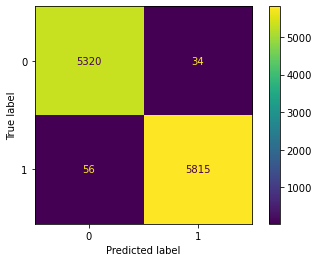

In [190]:
cfm=confusion_matrix(y_test, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=model_logreg.classes_)
disp.plot() 

In [191]:
# Export pipeline as pickle file
with open("model_logreg.pkl", "wb") as file:
    pickle.dump(model_logreg, file)

# Conclsion